In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
file_url = "https://raw.githubusercontent.com/B2W-BIT/We-are-Hiring/master/desafios-ia-front/clusters-sapatos/shoes.json"
data = pd.read_json(file_url, orient="records", lines=True)

# Primeira etapa - Análise dos dados

In [3]:
data.head(5)

,brand,categories,colors,condition,id,isSale,price
0,Naturalizer,"[Clothing, Heels, All Women's Shoes, Shoes, Sa...","[Silver, Cream]",USED,AVpfEf_hLJeJML431ueH,False,55.990
1,MUK LUKS,"[Clothing, All Women's Shoes, Women's Casual S...",[Grey],NEW,AVpi74XfLJeJML43qZAc,True,41.125
2,MUK LUKS,"[Clothing, All Women's Shoes, Women's Casual S...",[Grey],NEW,AVpi74XfLJeJML43qZAc,False,35.250
3,MUK LUKS,"[Clothing, All Women's Shoes, Shoes, Women's S...",[Black],NEW,AVpjXyCc1cnluZ0-V-Gj,False,24.750
4,MUK LUKS,"[Clothing, All Women's Shoes, Shoes, Women's S...",[Grey],NEW,AVphGKLPilAPnD_x1Nrm,True,31.695


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
brand         10000 non-null object
categories    10000 non-null object
colors        10000 non-null object
condition     10000 non-null object
id            10000 non-null object
isSale        10000 non-null bool
price         10000 non-null float64
dtypes: bool(1), float64(1), object(5)
memory usage: 478.6+ KB


In [5]:
data = data.dropna()
#get list of unique id's
product_id = data['id'].value_counts().keys().tolist()
product_counts = data['id'].value_counts().tolist()
print(len(product_id))
for index,product in enumerate(product_id):
    print('{} = {}'.format(product_id[index],product_counts[index]))

653
AV46uYe4glJLPUi8VW57 = 185
AV2cZ7SYGV-KLJ3al3p6 = 157
AVpfn5s3LJeJML43ArJE = 144
AV-nbnIEKZqtpbFMSzYa = 121
AVpidVDz1cnluZ0-Nd4_ = 109
AV-9jSoSHh53nbDR_pU4 = 104
AV-ncB20uC1rwyj_gefo = 104
AV-KM5O-uC1rwyj_gShN = 93
AV-nbouDuC1rwyj_gePn = 93
AV18-jylvKc47QAVn-h3 = 92
AV2cZiLFvKc47QAVpJgp = 92
AV_mmRf2YSSHbkXwrGfm = 86
AV_X3K6EKZqtpbFMT3S2 = 85
AV-ncA5QYSSHbkXwpaFB = 84
AVpgCsFKilAPnD_xmfqs = 83
AV-KNDYHuC1rwyj_gSqf = 83
AV3E8hOd-jtxr-f3-my_ = 82
AV_Ee390YSSHbkXwp-VX = 79
AV-XClqdHh53nbDR_SiY = 77
AV_NNwn5KZqtpbFMTjMu = 77
AV_LArQpHh53nbDRACAJ = 72
AV-ncQLSuC1rwyj_geqO = 70
AV-nbszEKZqtpbFMSzc4 = 69
AV2cVsE7vKc47QAVpJKS = 68
AV-ndG1uKZqtpbFMS0SV = 68
AV-ncQjsuC1rwyj_geqt = 64
AV-9hndsuC1rwyj_g2bb = 60
AV_Edw1AuC1rwyj_hCOe = 60
AV-9hriAuC1rwyj_g2dv = 58
AV-ncGQTuC1rwyj_geid = 58
AV-nbkV9Hh53nbDR_Uxh = 57
AV-9j2PqKZqtpbFMTHwP = 57
AV_F-EwUYSSHbkXwp_Hr = 55
AV_G_TH2KZqtpbFMTZLT = 54
AV_Edi7AHh53nbDR_0Lo = 53
AV_F-BU6Hh53nbDR_1Yq = 51
AV5AYAMO-jtxr-f3Du5h = 51
AV_G_P-ZuC1rwyj_hJK0 = 50
A

In [6]:
#get list of colors and amount times it appears
colors_names = data['colors'].value_counts().keys().tolist()
colors_counts = data['colors'].value_counts().tolist()
print(len(colors_counts))
for index,color in enumerate(colors_counts):
    print('{} = {}'.format(colors_names[index],colors_counts[index]))

203
['NA'] = 7369
['Pure', 'Blackchrome-Aurora'] = 185
['Black'] = 177
['White'] = 165
['Stone', 'Dark', 'Black', 'Black', 'Luxe', 'Silver', 'Stone', 'Black'] = 157
['Brown'] = 114
['Grey', 'Taupe', 'Black', 'Stone'] = 94
['Tan'] = 92
['Navy', 'White', 'Pewter', 'Soft', 'Black', 'Punch'] = 86
['Grey', 'Black', 'Taupe'] = 84
['Navy', 'Gold', 'Blue', 'Soft', 'Brown', 'Luggage', 'Soft', 'White', 'Black', 'Gray'] = 77
['Tan', 'Tan', 'Navy', 'Black', 'Blue', 'White', 'Pewter', 'White', 'Red', 'Black', 'Gray', 'Navy', 'Beige', 'Pewter'] = 77
['Inkdeadly', 'Anthracitedark'] = 72
['Blackmetallic'] = 64
['Blue', 'Black', 'Pewter'] = 51
['Navy', 'Turquo', 'Coral', 'Pewter', 'Yellow', 'Natural', 'Black'] = 48
['Navy', 'Navy', 'Dark', 'Blue', 'Ivory', 'Brown', 'Black', 'Gray', 'Grey', 'Dark'] = 44
['Silver', 'Pewter', 'Red', 'Black', 'Taupe'] = 44
['Black', 'White', 'Black', 'Natural', 'Metallic', 'Pewterchampagne', 'Bronze'] = 43
['Navy', 'Black', 'Tan', 'Navy', 'Brown', 'Black', 'Gore', 'Black',

Como pode se notar existem cores repetidas na mesma lista. Assim, essas repetições serão filtradas para que seja possível obter uma lista como os nomes de todas as cores possíveis.

In [7]:
#get list of unique colors
colors_list = []

for colors in colors_names:
    for color_name in colors:
        if color_name not in colors_list:
            colors_list.append(color_name)

print(len(colors_list))
print(colors_list)

223
['NA', 'Pure', 'Blackchrome-Aurora', 'Black', 'White', 'Stone', 'Dark', 'Luxe', 'Silver', 'Brown', 'Grey', 'Taupe', 'Tan', 'Navy', 'Pewter', 'Soft', 'Punch', 'Gold', 'Blue', 'Luggage', 'Gray', 'Red', 'Beige', 'Inkdeadly', 'Anthracitedark', 'Blackmetallic', 'Turquo', 'Coral', 'Yellow', 'Natural', 'Ivory', 'Metallic', 'Pewterchampagne', 'Bronze', 'Gore', 'Bone', 'Pink', 'Mushroom', 'Tornado', 'Me', 'Pinot', 'Lux', 'Purpleblack', 'Multi-Color', 'Blackblack', 'Blackwhite', 'Nude', 'Blacksilver', 'Purple', 'Light', 'Teal', 'Rainbow', 'Calypso', 'Frost', 'Coraltaupe', 'Blackcotton', 'Redpink', 'Whitegrey', 'Blueblue', 'Greypurple', 'Insignia', 'Tanwhite', 'Blackfrost', 'Blackgrey', 'Redyellow', 'Leopard', 'Blackgreen', 'Blackgreenbrown', 'Whitefire', 'Bordo', 'Medium', 'Peach', 'Tibetan', 'Slateblue', 'Poseidon', 'Bird', 'Quarry', 'Deep', 'Hawaiian', 'Vintage', 'Koa', 'Basalt', 'Aruba', 'AquariumFlashCoralBlueJewel', 'Wine', 'Fabric', 'Chocolate', 'Charcoal', 'Chestnut', 'Marlin', 'Jiffy

Agora sim temos uma lista com todas as cores possíveis. Interessante observar que existe uma color NA, ou seja, provavelmente existem cores que não foram listadas dentre as que já existem.

In [8]:
#get list of categories and amount times it appears
categories_names = data['categories'].value_counts().keys().tolist()
categories_counts = data['categories'].value_counts().tolist()
print(len(categories_counts))
for index,categories in enumerate(categories_counts):
    print('{} = {}'.format(categories_names[index],categories_counts[index]))

198
['Shoes', 'Boots', 'Womens', 'Journee Collection'] = 835
['Heels', 'Pumps', 'Journee Collection', 'Shoes', 'Womens'] = 581
['Shoes', 'Sandals', 'Womens', 'LifeStride'] = 446
['Shoes', 'Flats', 'Womens', 'Journee Collection'] = 320
['Shoes', 'Boots', 'Womens'] = 312
['Shoes', 'Flats', 'Womens', 'LifeStride'] = 310
['Womens', 'New Balance', 'Athletic Shoes', 'Shoes', 'Sneakers'] = 250
['Clothing', 'Easy Street', "All Women's Shoes", 'Shoes', 'Sandals', "Women's Shoes", 'Womens'] = 246
['Heels', 'Pumps', 'LifeStride', 'Shoes', 'Womens'] = 245
['Shoes', 'A2 by Aerosoles', 'Boots', 'Womens'] = 193
['Clothing', "Women's Athletic Shoes", 'Womens', "Women's Casual Shoes", 'Athletic Shoes', 'Shoes', "Women's Shoes", 'Nike', 'Sneakers'] = 185
['Shoes', 'Sandals', 'Womens', 'Journee Collection'] = 180
['Clothing', 'LifeStride', "All Women's Shoes", 'Shoes', 'Sandals', "Women's Shoes", 'Womens'] = 168
['Heels', 'Pumps', 'Clothing', 'LifeStride', "All Women's Shoes", 'Shoes', "Women's Dress Sho

Como podemos observar novamente, o mesmo que aconteceu para as cores, se repete nas categorias. 
Dessa maneira, precisamos fitlrar ainda mais os dados para se obter uma lista completa de categorias únicas.

In [9]:
#get list of unique categories
categories_list = []

for categories in categories_names:
    for category_name in categories:
        if category_name not in categories_list:
            categories_list.append(category_name)

print(len(categories_list))
print(categories_list)

124
['Shoes', 'Boots', 'Womens', 'Journee Collection', 'Heels', 'Pumps', 'Sandals', 'LifeStride', 'Flats', 'New Balance', 'Athletic Shoes', 'Sneakers', 'Clothing', 'Easy Street', "All Women's Shoes", "Women's Shoes", 'A2 by Aerosoles', "Women's Athletic Shoes", "Women's Casual Shoes", 'Nike', "Women's Dress Shoes", "Women's Casual Boots & Shoes", "Women's Footwear", "Dr. Scholl's", 'Loafers', 'Style Charles by Charles David', 'Clogs', 'Mules', 'Simply Vera Vera Wang', 'Apt. 9', 'Croft', 'Barrow', "Women's Trail Running Shoes", "Women's Running Shoes", 'Skechers', 'SONOMA Goods for Life', "Women's Boots", 'Comfort', "Women's Road Running Shoes", 'All Womens Shoes', 'Womens Shoes', 'Womens Casual Shoes', "Candie's", 'ASICS', 'Dolce by Mojo Moxy', 'Ryka', 'adidas', 'madden NYC', 'Clarks', "Men's Athletic Shoes", "Men's Shoes", 'Unionbay', 'NaturalSoul by naturalizer', 'Vans', 'LC Lauren Conrad', 'FILA', 'Kisses by 2 Lips Too', 'Athletic', 'Shoes & Accessories', 'Eastland', 'Keds', "Men's 

Repetindo a análise para as condições:

In [10]:
#get list of conditions and amount times it appears
condition_names = data['condition'].value_counts().keys().tolist()
condition_counts = data['condition'].value_counts().tolist()
print(len(condition_names))
for index,val in enumerate(condition_names):
    print('{} = {}'.format(condition_names[index],condition_counts[index]))
condition_list = condition_names

2
USED = 9562
NEW = 438


As condições são bem mais simples e só possuem duas alternativas, novo ou usado. 

# Segunda Etapa - Condicionamento das entradas

Agora precisamos criar apenas uma entrada para cada id, combinando as cores, condições e categorias. Como muitos dados possuem cores repetidas e categorias repetidas. Primeiro esses dados serão filtrados para que depois sejam codificados.

In [11]:
product_color_list = []
all_color_list = []
for product in product_id:
    product_color = []
    for colors in data[data['id'] == str(product)]['colors']:
        for name in colors:
            all_color_list.append([name])
            if name not in product_color:
                product_color.append(name)
    product_color_list.append(product_color)

for i,product in enumerate(product_id):
    print('id: {} has colors: {}'.format(product,product_color_list[i]))

id: AV46uYe4glJLPUi8VW57 has colors: ['Pure', 'Blackchrome-Aurora']
id: AV2cZ7SYGV-KLJ3al3p6 has colors: ['Stone', 'Dark', 'Black', 'Luxe', 'Silver']
id: AVpfn5s3LJeJML43ArJE has colors: ['White']
id: AV-nbnIEKZqtpbFMSzYa has colors: ['NA']
id: AVpidVDz1cnluZ0-Nd4_ has colors: ['Brown']
id: AV-9jSoSHh53nbDR_pU4 has colors: ['NA']
id: AV-ncB20uC1rwyj_gefo has colors: ['NA']
id: AV-KM5O-uC1rwyj_gShN has colors: ['NA']
id: AV-nbouDuC1rwyj_gePn has colors: ['NA']
id: AV18-jylvKc47QAVn-h3 has colors: ['Tan']
id: AV2cZiLFvKc47QAVpJgp has colors: ['Grey', 'Taupe', 'Black', 'Stone']
id: AV_mmRf2YSSHbkXwrGfm has colors: ['Navy', 'White', 'Pewter', 'Soft', 'Black', 'Punch']
id: AV_X3K6EKZqtpbFMT3S2 has colors: ['NA']
id: AV-ncA5QYSSHbkXwpaFB has colors: ['NA']
id: AVpgCsFKilAPnD_xmfqs has colors: ['Grey', 'Black', 'Taupe']
id: AV-KNDYHuC1rwyj_gSqf has colors: ['NA']
id: AV3E8hOd-jtxr-f3-my_ has colors: ['NA']
id: AV_Ee390YSSHbkXwp-VX has colors: ['NA']
id: AV-XClqdHh53nbDR_SiY has colors: ['Tan'

In [12]:
product_category_list = []
all_category_list = []
for product in product_id:
    product_category = []
    for categories in data[data['id'] == str(product)]['categories']:
        #print('name is {}'.format(product))
        for name in categories:
            all_category_list.append([name])
            if name not in product_category:
                product_category.append(name)
    product_category_list.append(product_category)

for i,product in enumerate(product_id):
    print('id: {} has categories: {}'.format(product,product_category_list[i]))

all_category_listDF = pd.DataFrame(data=all_category_list ,columns=['categories'])
categories_names_separeted = all_category_listDF['categories'].value_counts().keys().tolist()
categories_counts_separated = all_category_listDF['categories'].value_counts().tolist()
print(len(categories_counts_separated))
for index,categories in enumerate(categories_counts_separated):
    print('{} = {}'.format(categories_names_separeted[index],categories_counts_separated[index]))

id: AV46uYe4glJLPUi8VW57 has categories: ['Clothing', "Women's Athletic Shoes", 'Womens', "Women's Casual Shoes", 'Athletic Shoes', 'Shoes', "Women's Shoes", 'Nike', 'Sneakers']
id: AV2cZ7SYGV-KLJ3al3p6 has categories: ['Heels', 'Pumps', 'Clothing', 'LifeStride', "All Women's Shoes", 'Shoes', "Women's Dress Shoes", "Women's Shoes", 'Womens']
id: AVpfn5s3LJeJML43ArJE has categories: ['Clothing', 'Womens', "All Women's Shoes", "Women's Shoes", 'Athletic Shoes', 'Shoes', "Dr. Scholl's", 'Sneakers']
id: AV-nbnIEKZqtpbFMSzYa has categories: ['Heels', 'Pumps', 'Shoes', 'Simply Vera Vera Wang', 'Womens']
id: AVpidVDz1cnluZ0-Nd4_ has categories: ['Clothing', "All Women's Shoes", "Women's Shoes", 'Shoes', 'Boots', "Dr. Scholl's", 'Womens']
id: AV-9jSoSHh53nbDR_pU4 has categories: ['Shoes', 'Flats', 'Womens', 'LifeStride']
id: AV-ncB20uC1rwyj_gefo has categories: ['Shoes', 'Flats', 'Womens', 'LifeStride']
id: AV-KM5O-uC1rwyj_gShN has categories: ['SONOMA Goods for Life', 'Shoes', 'Sandals', 'Boo

In [13]:
all_category_listDF = pd.DataFrame(data=all_category_list ,columns=['categories'])
categories_names_separeted = all_category_listDF['categories'].value_counts().keys().tolist()
categories_counts_separated = all_category_listDF['categories'].value_counts().tolist()
print(len(categories_counts_separated))
for index,categories in enumerate(categories_counts_separated):
    print('{} = {}'.format(categories_names_separeted[index],categories_counts_separated[index]))
    
categoriesOrdered = categories_names_separeted[-1::-2]+categories_names_separeted[1::2]
print(categoriesOrdered)

124
Shoes = 9631
Womens = 9558
Women's Shoes = 2466
Clothing = 2436
Boots = 2238
Journee Collection = 2221
Heels = 2042
Pumps = 2027
All Women's Shoes = 1897
Sandals = 1814
LifeStride = 1593
Sneakers = 1578
Athletic Shoes = 1578
Flats = 1247
A2 by Aerosoles = 670
Women's Casual Shoes = 645
Easy Street = 585
Style Charles by Charles David = 478
Mules = 476
Clogs = 476
Nike = 448
Women's Dress Shoes = 368
Women's Footwear = 352
Women's Athletic Shoes = 344
Dr. Scholl's = 337
Skechers = 336
Loafers = 320
Barrow = 315
Croft = 315
New Balance = 255
SONOMA Goods for Life = 229
Women's Running Shoes = 201
Apt. 9 = 183
Womens Shoes = 166
Simply Vera Vera Wang = 164
Women's Casual Boots & Shoes = 151
Ryka = 147
Candie's = 144
Womens Casual Shoes = 127
Women's Boots = 123
ASICS = 111
NaturalSoul by naturalizer = 107
Women's Road Running Shoes = 101
Women's Trail Running Shoes = 100
madden NYC = 84
Comfort = 82
All Womens Shoes = 80
Spring Step = 79
adidas = 74
LC Lauren Conrad = 69
Men's Shoes =

In [14]:
product_condition_list = []
for product in product_id:
    product_condition = []
    for condition in data[data['id'] == str(product)]['condition']:
        #print('name is {}'.format(product))
        if condition not in product_condition:
            product_condition.append(condition)
    product_condition_list.append(product_condition)

for i,product in enumerate(product_id):
    print('id: {} has condition: {}'.format(product,product_condition_list[i]))

id: AV46uYe4glJLPUi8VW57 has condition: ['USED']
id: AV2cZ7SYGV-KLJ3al3p6 has condition: ['USED']
id: AVpfn5s3LJeJML43ArJE has condition: ['USED']
id: AV-nbnIEKZqtpbFMSzYa has condition: ['USED']
id: AVpidVDz1cnluZ0-Nd4_ has condition: ['USED']
id: AV-9jSoSHh53nbDR_pU4 has condition: ['USED']
id: AV-ncB20uC1rwyj_gefo has condition: ['USED']
id: AV-KM5O-uC1rwyj_gShN has condition: ['USED']
id: AV-nbouDuC1rwyj_gePn has condition: ['USED']
id: AV18-jylvKc47QAVn-h3 has condition: ['USED']
id: AV2cZiLFvKc47QAVpJgp has condition: ['USED']
id: AV_mmRf2YSSHbkXwrGfm has condition: ['USED']
id: AV_X3K6EKZqtpbFMT3S2 has condition: ['USED']
id: AV-ncA5QYSSHbkXwpaFB has condition: ['USED']
id: AVpgCsFKilAPnD_xmfqs has condition: ['USED', 'NEW']
id: AV-KNDYHuC1rwyj_gSqf has condition: ['USED']
id: AV3E8hOd-jtxr-f3-my_ has condition: ['USED']
id: AV_Ee390YSSHbkXwp-VX has condition: ['USED']
id: AV-XClqdHh53nbDR_SiY has condition: ['USED']
id: AV_NNwn5KZqtpbFMTjMu has condition: ['USED']
id: AV_LArQpH

É possível observar que apenas o produto com id AVpgCsFKilAPnD_xmfqs possui ambos as condições novo e usado.

In [15]:
cluster_data = pd.DataFrame(data=list(zip(product_id,product_color_list,product_category_list,product_condition_list)) , columns=['id','colors','categories','conditions'])
cluster_data.head(5)

,id,colors,categories,conditions
0,AV46uYe4glJLPUi8VW57,"[Pure, Blackchrome-Aurora]","[Clothing, Women's Athletic Shoes, Womens, Wom...",[USED]
1,AV2cZ7SYGV-KLJ3al3p6,"[Stone, Dark, Black, Luxe, Silver]","[Heels, Pumps, Clothing, LifeStride, All Women...",[USED]
2,AVpfn5s3LJeJML43ArJE,[White],"[Clothing, Womens, All Women's Shoes, Women's ...",[USED]
3,AV-nbnIEKZqtpbFMSzYa,[NA],"[Heels, Pumps, Shoes, Simply Vera Vera Wang, W...",[USED]
4,AVpidVDz1cnluZ0-Nd4_,[Brown],"[Clothing, All Women's Shoes, Women's Shoes, S...",[USED]


Agora que os dados estão prontos, será feita a codificação.

In [16]:
def create_col_labels(df,col_name):
    col = df[col_name].copy()
    col.update(col[(col.str.len() > 1)].apply(tuple))
    col.update(col[~(col.str.len() > 1)].apply(', '.join))
    
    cat_col = pd.Categorical(col, ordered=True, categories=col.value_counts().keys().tolist())
    labels, uniques = pd.factorize(cat_col,sort=True)
    df[col_name+'_labels'] = labels
    
create_col_labels(cluster_data,'categories')
create_col_labels(cluster_data,'colors')
create_col_labels(cluster_data,'conditions')

In [17]:
cluster_data.head(5)

,id,colors,categories,conditions,categories_labels,colors_labels,conditions_labels
0,AV46uYe4glJLPUi8VW57,"[Pure, Blackchrome-Aurora]","[Clothing, Women's Athletic Shoes, Womens, Wom...",[USED],121,47,0
1,AV2cZ7SYGV-KLJ3al3p6,"[Stone, Dark, Black, Luxe, Silver]","[Heels, Pumps, Clothing, LifeStride, All Women...",[USED],110,110,0
2,AVpfn5s3LJeJML43ArJE,[White],"[Clothing, Womens, All Women's Shoes, Women's ...",[USED],162,4,0
3,AV-nbnIEKZqtpbFMSzYa,[NA],"[Heels, Pumps, Shoes, Simply Vera Vera Wang, W...",[USED],161,0,0
4,AVpidVDz1cnluZ0-Nd4_,[Brown],"[Clothing, All Women's Shoes, Women's Shoes, S...",[USED],187,3,0


# Terceira Etapa - Clusterização

Por fim, iremos tentar agrupar os nossos dados a fim de encontrar 4 clusters de acordo com as semelhanças que forem encontradas.

In [18]:
num_clusters=4
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(cluster_data[['categories_labels','colors_labels','conditions_labels']])
cluster_data['KMeans_labels'] = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
for n_cluster in range(num_clusters):
    print('Para o Cluster {}:'.format(n_cluster))
    print('Centro em x: {:.3f}, y: {:.3f}, z: {:.3f}'.format(cluster_centers[n_cluster,0],cluster_centers[n_cluster,1],cluster_centers[n_cluster,2]))
    print('Média dos preços é de {:.2f}, com o desvio padrão de {:.2f}\n'.format(
        data[data['id'].isin(cluster_data[cluster_data['KMeans_labels']==n_cluster]['id'])]['price'].agg('mean'),
          data[data['id'].isin(cluster_data[cluster_data['KMeans_labels']==n_cluster]['id'])]['price'].agg('std')))

Para o Cluster 0:
Centro em x: 7.710, y: 136.000, z: 0.960
Média dos preços é de 79.77, com o desvio padrão de 36.78

Para o Cluster 1:
Centro em x: 19.453, y: 4.871, z: 0.196
Média dos preços é de 58.86, com o desvio padrão de 15.26

Para o Cluster 2:
Centro em x: 140.969, y: 8.667, z: 0.073
Média dos preços é de 59.56, com o desvio padrão de 17.32

Para o Cluster 3:
Centro em x: 113.414, y: 140.103, z: 0.207
Média dos preços é de 60.93, com o desvio padrão de 25.99



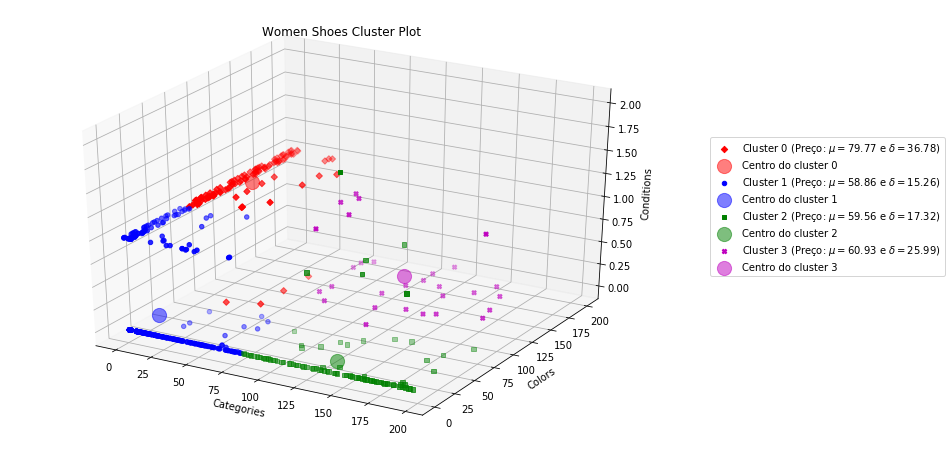

In [19]:
#make 3d plot with cluster data
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')

plot_color  = ['r','b','g','m']
plot_marker = ['D','o','s','X']

for c,m,cluster_label in zip(plot_color,plot_marker,range(num_clusters)):
    xs = cluster_data[cluster_data['id'].isin(cluster_data[cluster_data['KMeans_labels']==cluster_label]['id'])]['categories_labels']
    ys = cluster_data[cluster_data['id'].isin(cluster_data[cluster_data['KMeans_labels']==cluster_label]['id'])]['colors_labels']
    zs = cluster_data[cluster_data['id'].isin(cluster_data[cluster_data['KMeans_labels']==cluster_label]['id'])]['conditions_labels']
    mean_price = data[data['id'].isin(cluster_data[cluster_data['KMeans_labels']==cluster_label]['id'])]['price'].agg('mean')
    std_price = data[data['id'].isin(cluster_data[cluster_data['KMeans_labels']==cluster_label]['id'])]['price'].agg('std')
    ax.scatter(xs, ys, zs, c=c, marker=m, label='Cluster '+str(cluster_label)+' (Preço: $\mu = $'+str(round(mean_price,2))+' e $\delta = $'+str(round(std_price,2))+')')
    ax.scatter(cluster_centers[cluster_label, 0], cluster_centers[cluster_label, 1],cluster_centers[cluster_label,2],  
               c=c, s=200, alpha=0.5, label='Centro do cluster '+str(cluster_label));

ax.set_title('Women Shoes Cluster Plot')
ax.set_xlabel('Categories')
ax.set_ylabel('Colors')
ax.set_zlabel('Conditions')
ax.legend(bbox_to_anchor=(1.05, .7), loc='upper left', borderaxespad=0.)

plt.show()